<a href="https://colab.research.google.com/github/ans90990/Assignment7/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()

In [32]:
#convolutional input layer 32 feature maps with size of 3x3 with dropout layer at 20%
model.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), padding = 'same', activation = 'relu', kernel_constraint = max_norm(3)))
model.add(Dropout(0.2))


In [33]:
#convolutional layer 32 feature maps with size of 3x3 with maxpool layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [34]:
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
# Dropout layer at 20%
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))

In [35]:
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
#Max Pool layer with size 2×2.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D((2,2), padding='same'))

In [36]:
#Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
#Dropout layer at 20%.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))

In [37]:
#Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
#Max Pool layer with size 2×2.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D((2, 2), padding = 'same'))

In [38]:
#flatten layer
model.add(Flatten())

In [39]:
#dropout layer at 20%
model.add(Dropout(0.2))

In [ ]:
#fully connected layer with 1024 units and a rectifier activation functino
model.add(Dense(num_classes, activation = 'relu'))

In [40]:
#dropout layer at 20%
model.add(Dropout(0.2))

In [41]:
#fully connected layer with 512 units and a rectifier activation functino
model.add(Dense(num_classes, activation = 'relu'))

In [42]:
#dropout layer at 20%
model.add(Dropout(0.2))

In [43]:
#fully connected output layer with 10 units and a softmax activation functino
model.add(Dense(num_classes, activation='softmax'))

In [44]:
#compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [53]:
#fit the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = 32)


Epoch 1/25
1563/1563 [==============================] - 439s 281ms/step - loss: 0.9882 - accuracy: 0.6616 - val_loss: 0.8718 - val_accuracy: 0.7196
Epoch 2/25
1563/1563 [==============================] - 396s 253ms/step - loss: 0.9895 - accuracy: 0.6624 - val_loss: 0.8855 - val_accuracy: 0.7224
Epoch 3/25
1563/1563 [==============================] - 404s 258ms/step - loss: 1.0047 - accuracy: 0.6580 - val_loss: 0.8167 - val_accuracy: 0.7354
Epoch 4/25
1563/1563 [==============================] - 398s 255ms/step - loss: 0.9868 - accuracy: 0.6647 - val_loss: 0.8028 - val_accuracy: 0.7440
Epoch 5/25
1563/1563 [==============================] - 402s 257ms/step - loss: 0.9975 - accuracy: 0.6605 - val_loss: 0.8639 - val_accuracy: 0.7115
Epoch 6/25
1563/1563 [==============================] - 399s 256ms/step - loss: 0.9967 - accuracy: 0.6618 - val_loss: 0.8554 - val_accuracy: 0.7174
Epoch 7/25
1563/1563 [==============================] - 397s 254ms/step - loss: 1.0102 - accuracy: 0.6550 - val_

In [54]:
#save model
model.save("my_model.keras")

In [55]:
#evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 71.18%


In [56]:
#predict first four images of the test data using the above model
predictions = model.predict(X_test)
print("Predictions for the first sample:")
print(predictions[0])
print(predictions[1])
print(predictions[2])
print(predictions[3])

313/313 [==============================] - 20s 64ms/step
Predictions for the first sample:
[0.03433524 0.00480939 0.10859136 0.21826315 0.02544708 0.2339465
 0.24794844 0.01000117 0.10808936 0.00856823]
[2.2838195e-01 1.1658391e-02 1.5717750e-02 1.8762435e-03 1.1827442e-03
 2.5719444e-03 1.1746754e-03 1.1358139e-04 7.3358357e-01 3.7392247e-03]
[0.36085334 0.01513838 0.09858095 0.01722789 0.01440055 0.01954742
 0.00614464 0.00423189 0.44603524 0.01783976]
[0.5156573  0.10047676 0.09875373 0.01868408 0.01150999 0.01066509
 0.00324165 0.00293166 0.19207568 0.04600399]


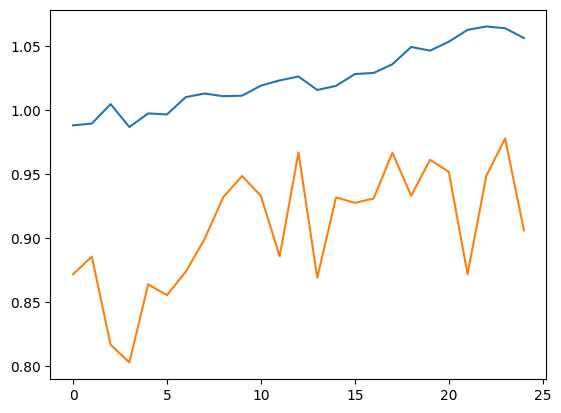

In [60]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

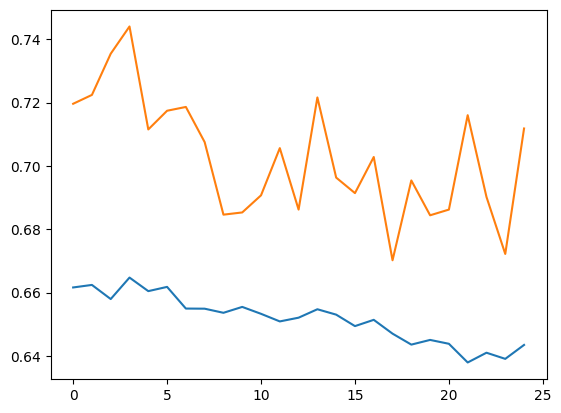

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()